# Reconstructing the Logistic Map

In [1]:
from CommonFunctions import *
import sympy as sp
import numpy as np
import numba as nb
from matplotlib import pyplot as plt

In [2]:
x_n, a = sp.symbols('x_n a')
x_n_plus1 = sp.Function('x_{n+1}')(x_n)
quadratic_map_symbolic = sp.Eq(x_n_plus1, a * x_n * (1 - x_n))
quadratic_map_symbolic

Eq(x_{n+1}(x_n), a*x_n*(1 - x_n))

In [3]:
@nb.njit()
def quadratic_map_expression(x, a):
    return a * x * (1 - x)

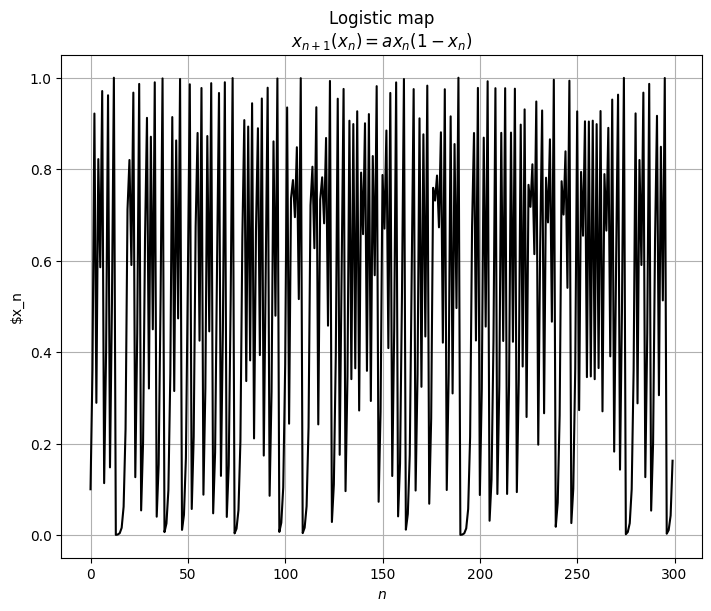

In [4]:
x_0, n, a_val = 0.1, 300, 4.0
n_values = np.arange(n)
quadratic_map = logistic_map(x_0, n, quadratic_map_expression, a_val)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(n_values, quadratic_map, color='black')
axes.grid()
_=axes.set(xlabel=f'$n$', ylabel=f'${x_n}', title=f'Logistic map\n${sp.latex(quadratic_map_symbolic)}$')

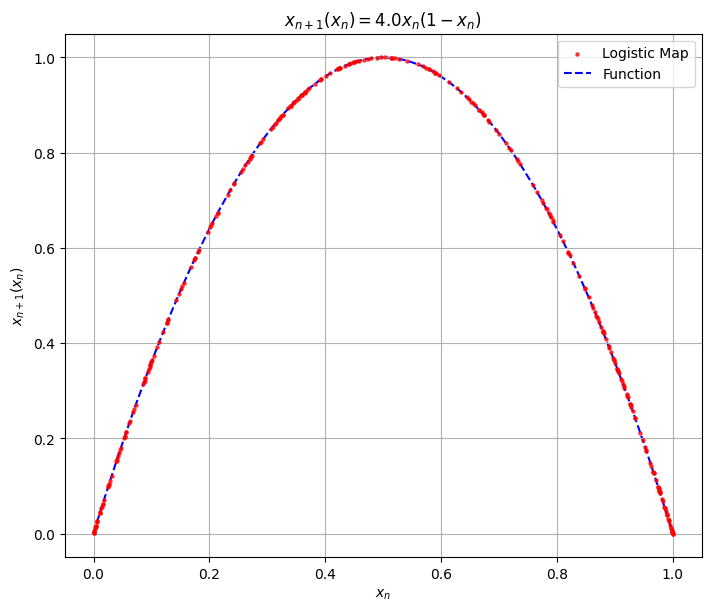

In [5]:
quadratic_map_sorted = np.sort(quadratic_map)
quadratic_map_function = sp.lambdify(x_n, quadratic_map_symbolic.rhs.subs(a, a_val), 'numpy')(quadratic_map_sorted)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.scatter(quadratic_map[:-1], quadratic_map[1:], color='red', zorder=2, label='Logistic Map', alpha=0.7, s=5)
axes.plot(quadratic_map_sorted, quadratic_map_function, zorder=1, color='blue', label='Function', linestyle='--')
axes.grid()
axes.legend()
_=axes.set(xlabel=f'${x_n}$', ylabel=f'${x_n_plus1}$', 
           title=f'${sp.latex(quadratic_map_symbolic.subs(a, a_val))}$')

# Reconstructing Random Data

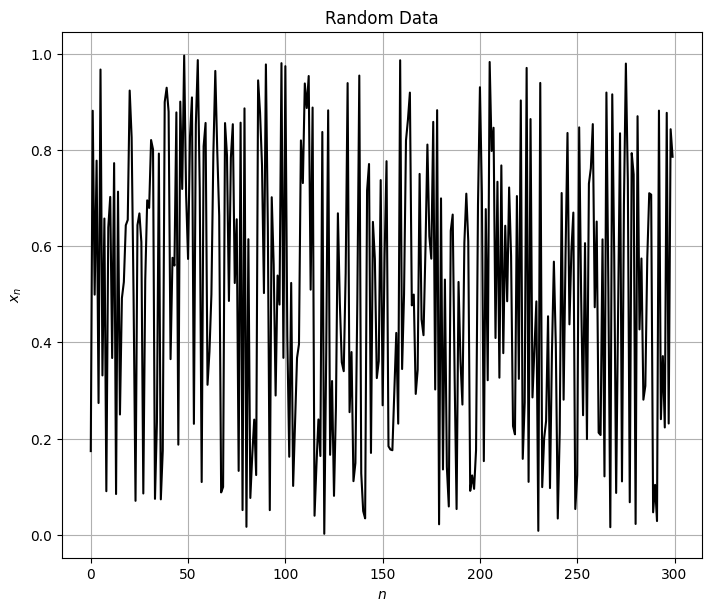

In [6]:
random_data = np.random.random(n)
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(n_values, random_data, color='black')
axes.grid()
_=axes.set(xlabel=f'$n$', ylabel=f'${x_n}$', title=f'Random Data')

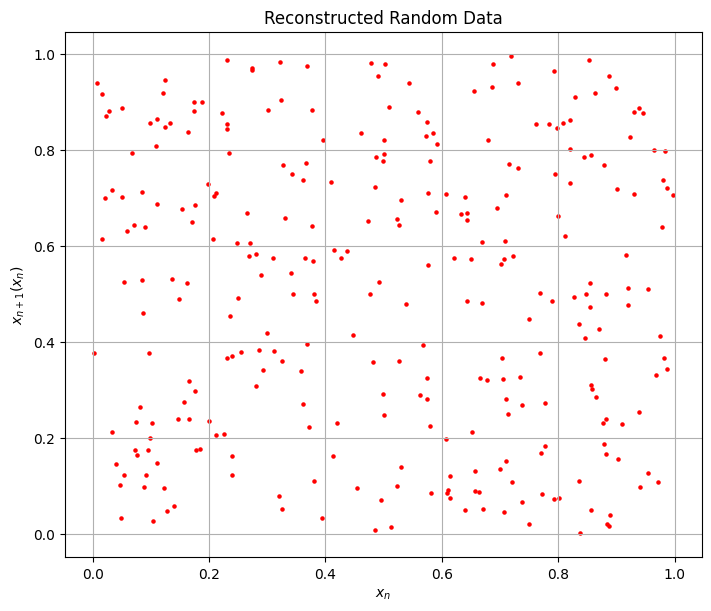

In [7]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.scatter(random_data[:-1], random_data[1:], color='red', marker='o', s=5)
axes.grid()
_=axes.set(xlabel=f'${x_n}$', ylabel=f'${x_n_plus1}$', 
           title=f'Reconstructed Random Data')

# Reconstructing Lorenz's attractor

In [8]:
t, sigma, r, b = sp.symbols('t sigma r b')
x = sp.Function('x')(t)
y = sp.Function('y')(t)
z = sp.Function('z')(t)
z

z(t)

In [9]:
x_eq = sp.Eq(x.diff(t), sigma * (y - x))
x_eq

Eq(Derivative(x(t), t), sigma*(-x(t) + y(t)))

In [10]:
y_eq = sp.Eq(y.diff(t), r*x - y - x*z)
y_eq

Eq(Derivative(y(t), t), r*x(t) - x(t)*z(t) - y(t))

In [11]:
z_eq = sp.Eq(z.diff(t), x*y - b*z)
z_eq

Eq(Derivative(z(t), t), -b*z(t) + x(t)*y(t))

In [12]:
sigma_val, r_val, b_val = 10, 28, sp.Rational(8, 3)
x_eq = x_eq.subs(sigma, sigma_val)
y_eq = y_eq.subs(r, r_val)
z_eq = z_eq.subs(b, b_val)
expressions = [x_eq.rhs, y_eq.rhs, z_eq.rhs]
t_0, n, dT = 0, 2000, 1/40
t_range = np.arange(n + 1) * dT
initial_point = (2, 5, 5)
t_, solution = solve_numerically_system_of_equations(
    expressions, [x, y, z], t, t_range, t_0, initial_point
)

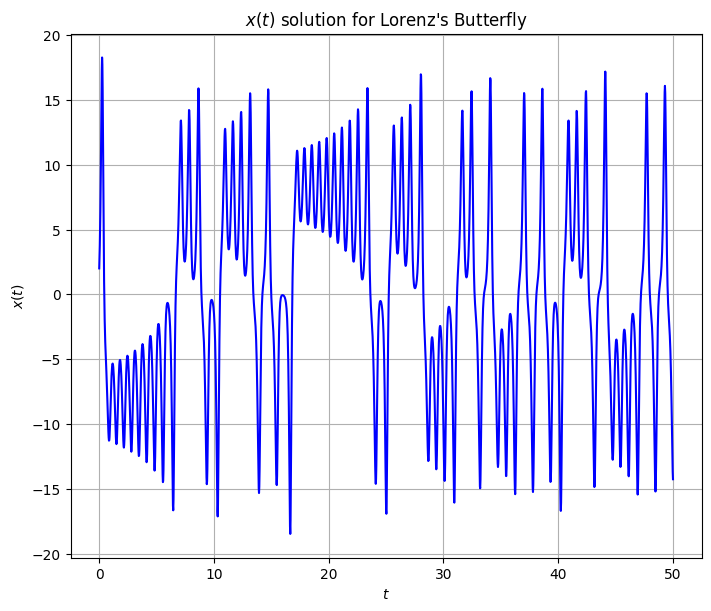

In [13]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(t_range, solution[0], color='blue')
axes.grid()
_=axes.set(xlabel=f'${t}$', ylabel=f'${x}$', title=f'${x}$ solution for Lorenz\'s Butterfly')

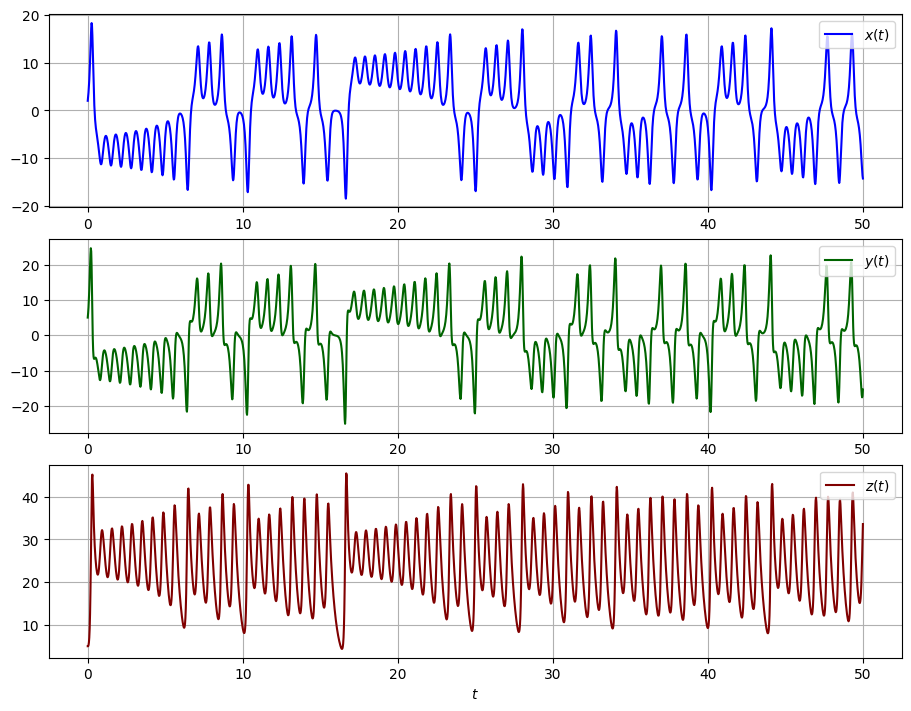

In [14]:
figure, axes = plt.subplots(3, 1, layout='constrained', figsize=(9, 7))
for sol, color, ax, func in zip(solution, ['blue', 'darkgreen', 'maroon'], figure.axes, [x, y, z]):
    ax.plot(t_range, sol, color=color, label=f'${func}$')
    ax.grid()
    ax.legend(loc='upper right')
_=axes[-1].set(xlabel=f'${t}$')

Splitting $x(t)$ into triplets

In [15]:
x_values = solution[0]
shift = 3
x_values_x = x_values[:-2*shift]
x_values_y = x_values[shift:-shift]
x_values_z = x_values[2*shift:]
print(len(x_values_x), len(x_values_y), len(x_values_z))

1995 1995 1995


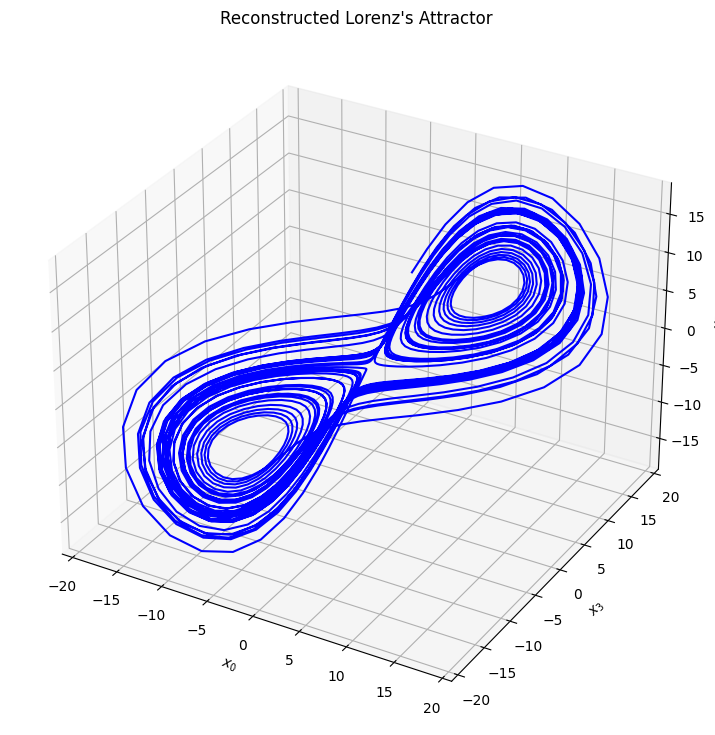

In [16]:
# %matplotlib widget
figure = plt.figure()
axes = figure.add_subplot(111, projection='3d')
axes.plot(x_values_x, x_values_y, x_values_z, color='blue')
figure.set_size_inches(9, 9)
_=axes.set(xlabel='$x_0$', ylabel=f'$x_{shift}$', zlabel=f'$x_{2*shift}$',
           title=f'Reconstructed Lorenz\'s Attractor')

# Reconstructing Rossler's Attractor

In [17]:
t, a, b, c = sp.symbols('t a b c')
x = sp.Function('x')(t)
y = sp.Function('y')(t)
z = sp.Function('z')(t)

x_eq = sp.Eq(x.diff(t), -y - z)
x_eq

Eq(Derivative(x(t), t), -y(t) - z(t))

In [18]:
y_eq = sp.Eq(y.diff(t), x + a*y)
y_eq

Eq(Derivative(y(t), t), a*y(t) + x(t))

In [19]:
z_eq = sp.Eq(z.diff(t), b + z*(x - c))
z_eq

Eq(Derivative(z(t), t), b + (-c + x(t))*z(t))

In [20]:
a_val, b_cal, c_val = sp.Rational(2, 10), sp.Rational(2, 10), sp.Rational(57, 10)
y_eq = y_eq.subs(a, a_val)
z_eq = z_eq.subs([(b, b_val), (c, c_val)])
expressions = [x_eq.rhs, y_eq.rhs, z_eq.rhs]
t_0, n, dT = 0, 3000, 1/40
t_range = np.arange(n + 1) * dT
initial_point = (0.1, 0.1, 0.1)
t_, solution = solve_numerically_system_of_equations(
    expressions, [x, y, z], t, t_range, t_0, initial_point
)

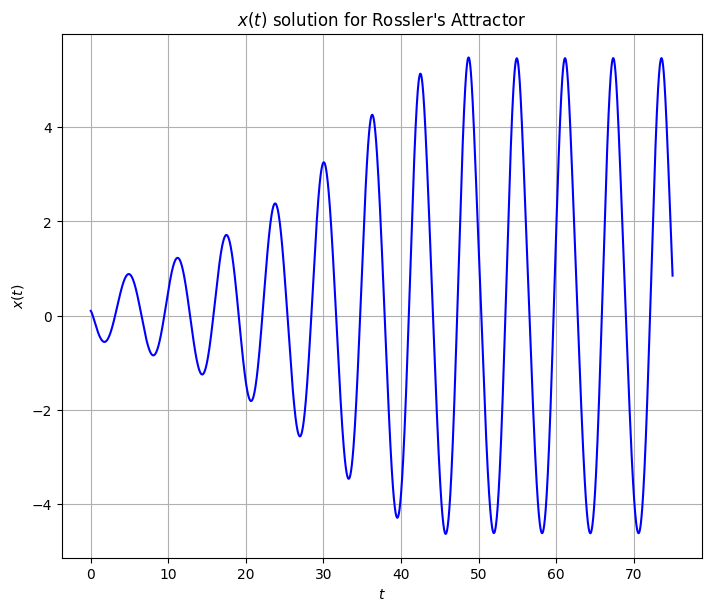

In [21]:
figure, axes = plt.subplots(1, 1, layout='constrained', figsize=(7, 6))
axes.plot(t_range, solution[0], color='blue')
axes.grid()
_=axes.set(xlabel=f'${t}$', ylabel=f'${x}$', title=f'${x}$ solution for Rossler\'s Attractor')

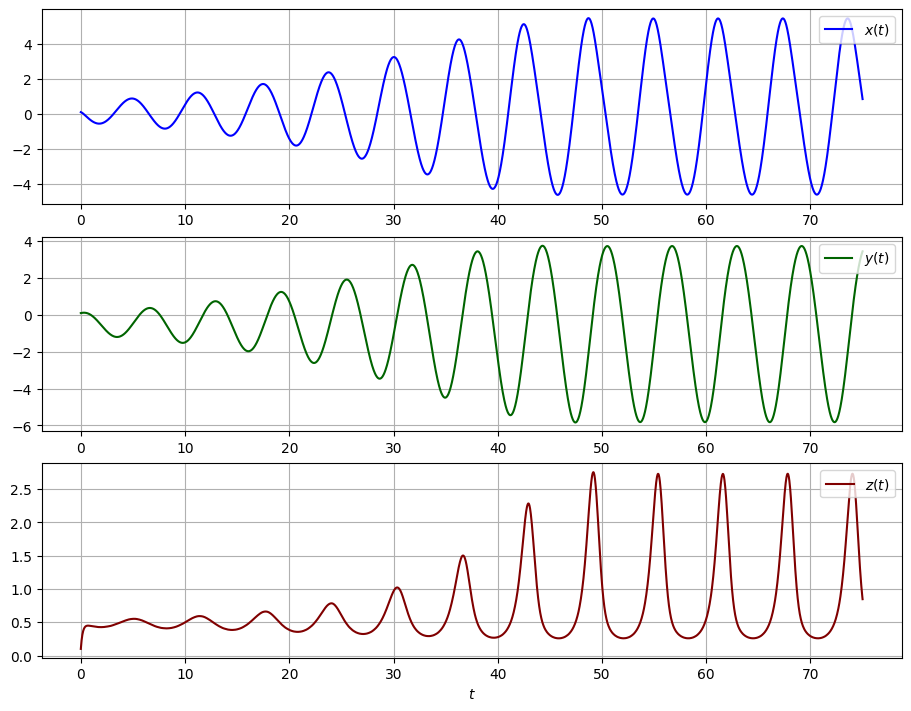

In [22]:
figure, axes = plt.subplots(3, 1, layout='constrained', figsize=(9, 7))
for sol, color, ax, func in zip(solution, ['blue', 'darkgreen', 'maroon'], figure.axes, [x, y, z]):
    ax.plot(t_range, sol, color=color, label=f'${func}$')
    ax.grid()
    ax.legend(loc='upper right')
_=axes[-1].set(xlabel=f'${t}$')

In [23]:
x_values = solution[0]
shift = 4
x_values_x = x_values[:-2*shift]
x_values_y = x_values[shift:-shift]
x_values_z = x_values[2*shift:]
print(len(x_values_x), len(x_values_y), len(x_values_z))

2993 2993 2993


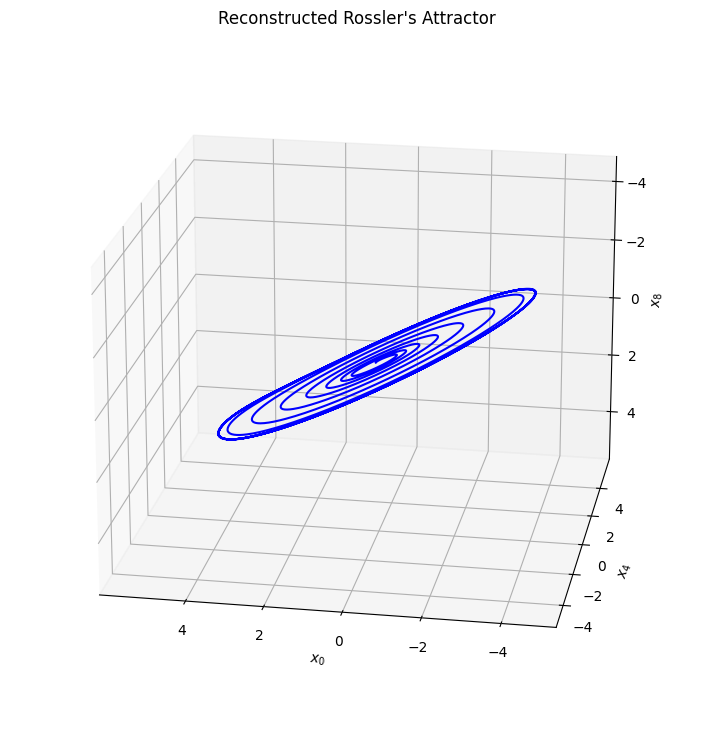

In [24]:
# %matplotlib widget
figure = plt.figure()
axes = figure.add_subplot(111, projection='3d')
axes.plot(x_values_x, x_values_y, x_values_z, color='blue')
figure.set_size_inches(9, 9)
axes.view_init(elev=200, azim=80)
_=axes.set(xlabel='$x_0$', ylabel=f'$x_{shift}$', zlabel=f'$x_{2*shift}$',
           title=f'Reconstructed Rossler\'s Attractor')